# Analysis 5

In [1]:
%matplotlib inline

In [6]:
# importing required libraries
import os
import sys
import subprocess
import stat
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [3]:
# absolute path till parent folder
abs_path = os.getcwd()
path_array = abs_path.split("/")
path_array = path_array[:len(path_array)-1]
homefolder_path = ""
for i in path_array[1:]:
    homefolder_path = homefolder_path + "/" + i 

In [4]:
# path to clean data
clean_data_path = homefolder_path + "/CleanData/CleanedDataSet/cleaned_autos.csv"

# reading csv into raw dataframe
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [9]:
# concatinating files of the same brand 
search_term = str(sys.argv[1])
# search_term = "audi"
path = homefolder_path + "/CleanData/DataForAnalysis/" + search_term # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)


In [15]:
frame.head(2)

dateCrawled                      name  seller offerType  price  \
0  2016-03-10 18:39:50       A3_2.0_TDI_Ambition  privat     Offer   2900   
1  2016-03-27 03:02:04  Audi_A3_2.0_FSI_Ambiente  privat     Offer   4990   

  abtest vehicleType  yearOfRegistration      gearbox  powerPS    ...     \
0   test      andere                2003  Unspecified        0    ...      
1   test      andere                2003      manuell      150    ...      

  postalCode             lastSeen yearOfCreation yearCrawled monthOfCreation  \
0      97996  2016-03-10 18:39:50           2016      2016.0           March   
1      74676  2016-03-30 14:46:54           2016      2016.0           March   

  monthCrawled NoOfDaysOnline  NoOfHrsOnline yearsOld monthsOld  
0        March            0.0           18.0     13.0       2.0  
1        March            3.0           14.0     13.0       3.0  

[2 rows x 27 columns]

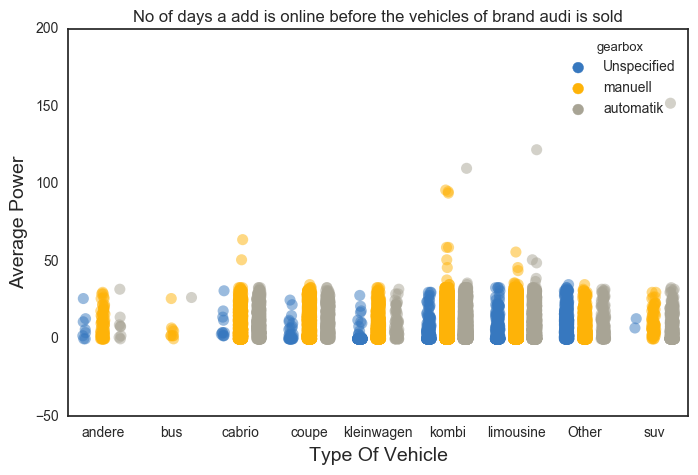

In [29]:
# colors = ["#47d147", "#ff8c1a","#a180cc"]
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.stripplot(x="vehicleType", y="NoOfDaysOnline", hue="gearbox", split=True, data=frame,size=8, alpha=0.5, jitter=True)
ax.set_title("No of days a add is online before the vehicles of brand " + search_term + " is sold")
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("No of days online",fontdict= {'size':14})
plt.show()

In [27]:
fig.savefig((abs_path + "/Plots/vehicletype-NoOfDaysOnline.png"))